In [24]:
import pandas as pd
from sklearn.ensemble import IsolationForest

import matplotlib.pyplot as plt




In [25]:
# Load the data
data = pd.read_csv(r'C:\Users\Abdul Moeen Khan\Desktop\CloudWatch_Traffic_Web_Attack.csv')

In [26]:
data

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
278,3638,3190,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
279,25207794,1561220,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
280,5736,12114,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule


In [27]:
# Check for missing values
print(data.isnull().sum())

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64


In [28]:
# Convert time columns to datetime
data['creation_time'] = pd.to_datetime(data['creation_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

In [29]:
# Calculate packet size
data['packet_size'] = data['bytes_in'] + data['bytes_out']

In [30]:
# Calculate time interval in seconds
data['time_interval'] = (data['end_time'] - data['creation_time']).dt.total_seconds()

In [31]:
# Select features for anomaly detection
features = data[['packet_size', 'time_interval']]


In [32]:
# Initialize Isolation Forest
isolation_forest = IsolationForest(contamination=0.01)

In [43]:
# Fit the model
data['anomaly'] = isolation_forest.fit_predict(features)

C:\Program Files\moeen kusra\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [34]:
# Anomalies are marked as -1
anomalies = data[data['anomaly'] == -1]
print(anomalies)

     bytes_in  bytes_out             creation_time                  end_time  \
257  24326941    1529035 2024-04-26 09:30:00+00:00 2024-04-26 09:40:00+00:00   
267  25199191    1557598 2024-04-26 09:40:00+00:00 2024-04-26 09:50:00+00:00   
279  25207794    1561220 2024-04-26 09:50:00+00:00 2024-04-26 10:00:00+00:00   

            src_ip src_ip_country_code protocol  response.code  dst_port  \
257  155.91.45.242                  US    HTTPS            200       443   
267  155.91.45.242                  US    HTTPS            200       443   
279  155.91.45.242                  US    HTTPS            200       443   

           dst_ip              rule_names  \
257  10.138.69.97  Suspicious Web Traffic   
267  10.138.69.97  Suspicious Web Traffic   
279  10.138.69.97  Suspicious Web Traffic   

                         observation_name   source.meta     source.name  \
257  Adversary Infrastructure Interaction  AWS_VPC_Flow  prod_webserver   
267  Adversary Infrastructure Interaction  

In [35]:
# Count the number of anomalies detected
num_anomalies = anomalies.shape[0]
print(f"Number of anomalies detected: {num_anomalies}")

Number of anomalies detected: 3


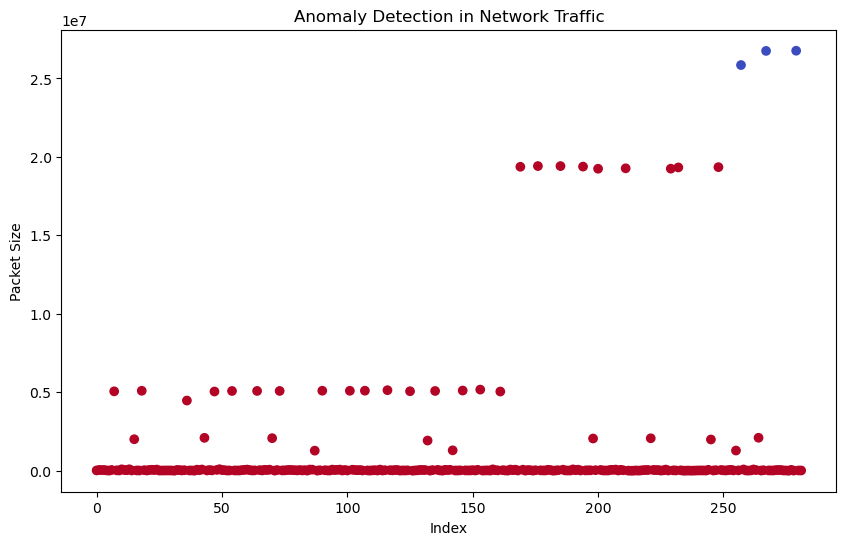

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['packet_size'], c=data['anomaly'], cmap='coolwarm')
plt.xlabel('Index')
plt.ylabel('Packet Size')
plt.title('Anomaly Detection in Network Traffic')
plt.show()

In [37]:
# Count the number of normal and anomalous instances
normal_count = data['anomaly'].value_counts()[1]
anomaly_count = data['anomaly'].value_counts()[-1]

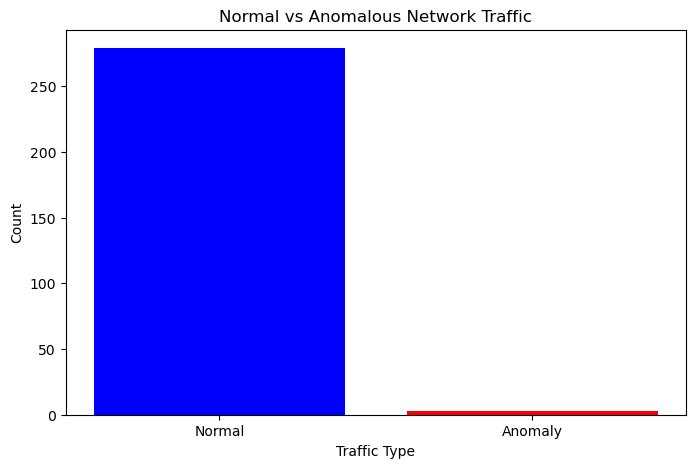

In [38]:
# Create a bar graph
plt.figure(figsize=(8, 5))
plt.bar(['Normal', 'Anomaly'], [normal_count, anomaly_count], color=['blue', 'red'])
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.title('Normal vs Anomalous Network Traffic')
plt.show()

In [39]:
# Filter anomalies
anomalies = data[data['anomaly'] == -1]

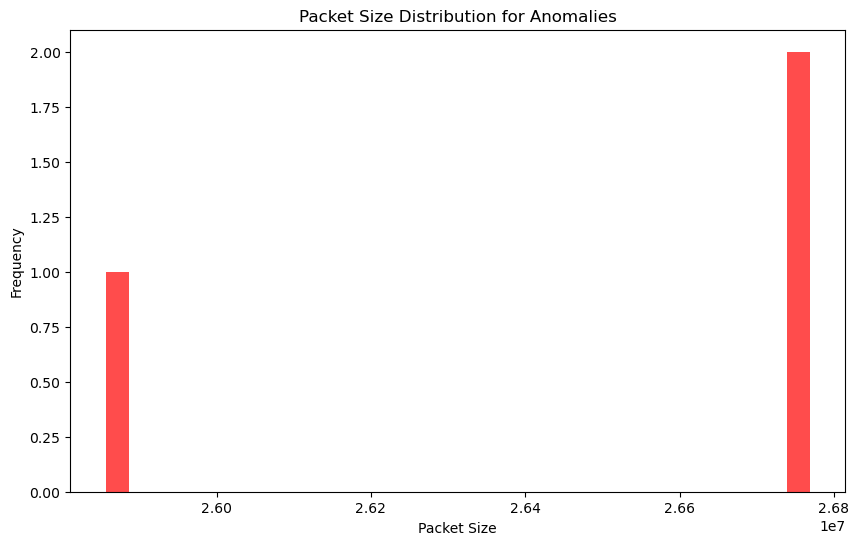

In [40]:
# Plot packet size distribution for anomalies
plt.figure(figsize=(10, 6))
plt.hist(anomalies['packet_size'], bins=30, color='red', alpha=0.7)
plt.xlabel('Packet Size')
plt.ylabel('Frequency')
plt.title('Packet Size Distribution for Anomalies')
plt.show()

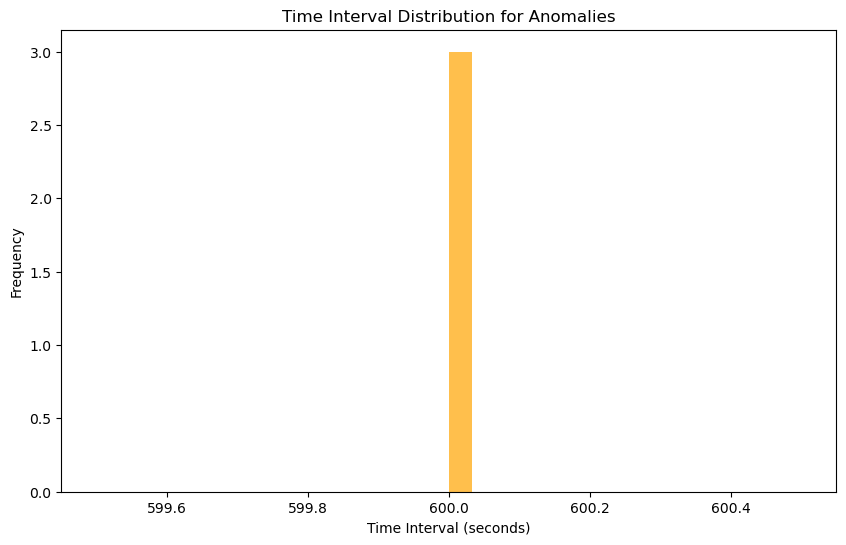

In [41]:
# Plot time interval distribution for anomalies
plt.figure(figsize=(10, 6))
plt.hist(anomalies['time_interval'], bins=30, color='orange', alpha=0.7)
plt.xlabel('Time Interval (seconds)')
plt.ylabel('Frequency')
plt.title('Time Interval Distribution for Anomalies')
plt.show()
